# Day 05 – Probability & Distributions 📈
### Topic: Anomaly Detection in Real Data

## 🎯 Goal:
### Understand how probability distributions help detect anomalies in real-world data.

## 🧠 Concept Overview

- **Probability Distribution:** Describes how values are spread in data.
- **Normal Distribution:** Most data points lie around the mean.
- **Anomaly Detection:** Identifying points that are statistically far from the expected range.
- **Z-score:** Measures how far a point is from the mean (in standard deviations).

## 📊 Step 1: Generate Sample Data

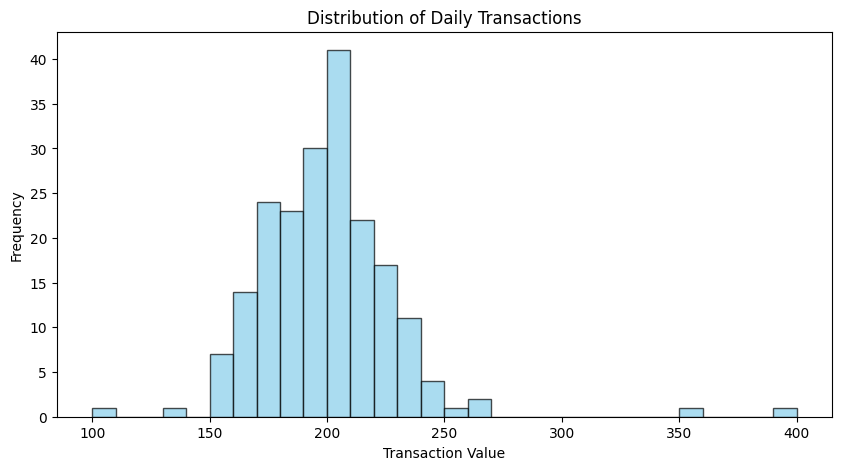

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data (daily transactions)
np.random.seed(42)
data = np.random.normal(200, 25, 200)  # mean=200, std=25

# Add anomalies
data[10] = 350
data[50] = 400
data[150] = 100

plt.figure(figsize=(10,5))
plt.hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Transactions')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()


## 🧮 Step 2: Detect Anomalies Using Z-score

Z-score formula:  
$Z =  \ \frac{X - \ \mu }{\ \sigma}$

Any point where |Z| > 3 is usually considered an anomaly.


In [15]:
# Calculate Z-scores
mean = np.mean(data)
std = np.std(data)
z_scores = [(x - mean) / std for x in data]

# Find anomalies
anomalies = [data[i] for i in range(len(z_scores)) if abs(z_scores[i]) > 3]

print('Anomalies Detected:', anomalies)

Anomalies Detected: [np.float64(350.0), np.float64(400.0), np.float64(100.0)]


## 📈 Step 3: Visualize Anomalies

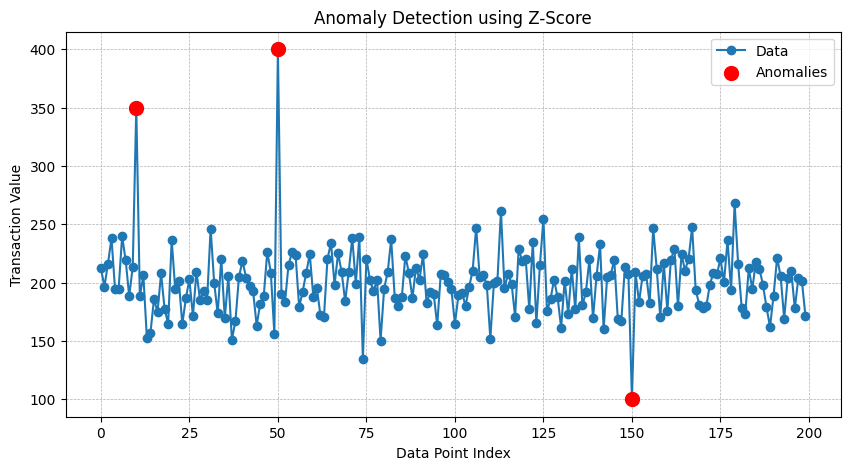

Anomaly Indices: [10, 50, 150]
Anomaly Values: [np.float64(350.0), np.float64(400.0), np.float64(100.0)]


In [16]:
# 1. Find the indices of the anomalies first
anomaly_indices = [i for i, score in enumerate(z_scores) if abs(score) > 3]

# 2. Use those indices to get the corresponding values from the original data
anomaly_values = [data[i] for i in anomaly_indices]

# 3. Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-', label='Data') # Added linestyle for clarity

# 4. Plot the anomalies using the aligned indices and values
plt.scatter(anomaly_indices, anomaly_values, color='red', s=100, label='Anomalies', zorder=5) # Made markers bigger and appear on top

# Add labels and title
plt.title('Anomaly Detection using Z-Score')
plt.xlabel('Data Point Index')
plt.ylabel('Transaction Value')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Added a grid for better readability
plt.show()

# Optional: Print the results for verification
print(f"Anomaly Indices: {anomaly_indices}")
print(f"Anomaly Values: {anomaly_values}")


## 🧩 Step 4: Real-World Use Cases
- **Finance:** Detect fraudulent transactions.
- **IoT:** Spot malfunctioning sensors.
- **Healthcare:** Identify abnormal patient readings.

## ✅ Step 5: Summary
- Probability Distributions model *normal behavior.*
- Z-score helps detect *outliers quantitatively.*
- Anomaly detection is key for *early warnings in real systems.*